In [95]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
import scipy.signal
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

In [9]:
colnames = ['energy', 'count']
df = pd.read_csv(r'C:\Users\atara\문서\VScode\2024전산물리\hist2.csv', names=colnames)
df.head()

,energy,count
0,0.0000,6
1,0.0816,4
2,0.1633,5
3,0.2449,8
4,0.3265,26


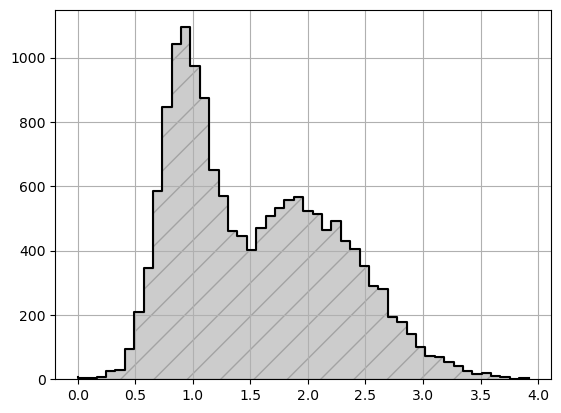

In [65]:
plt.step(df["energy"], df["count"], color='k')
plt.fill_between(df["energy"], df["count"], step="pre", color='k', alpha=0.2, hatch='/')
plt.ylim(bottom=0)
plt.grid()
plt.show()

In [48]:
x_array = np.asarray(df['energy'])
y_array = np.asarray(df['count'])

In [49]:
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))

In [52]:
popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x_array, y_array)

perr_2gauss = np.sqrt(np.diag(pcov_2gauss))

pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(x_array, *pars_1)
gauss_peak_2 = _1gaussian(x_array, *pars_2)

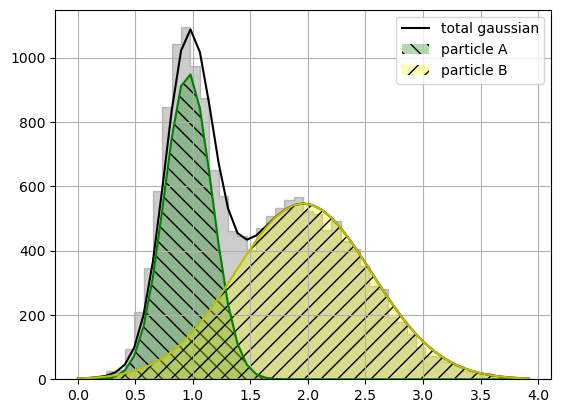

In [93]:
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

#ax1.step(x_array, y_array, color='k', linewidth=0.5, label='original data')
ax1.fill_between(df["energy"], df["count"], step="pre", color='k', alpha=0.2)
ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), color='k', label='total gaussian')

ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.3, hatch='\\\\', label='particle A')

ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.3, hatch='//', label='particle B') 

ax1.grid()
ax1.legend()
plt.ylim(bottom=0)
plt.show()

In [97]:
print("-------------Peak 1-------------")
print("amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], perr_2gauss[0]))
print("center = %0.2f (+/-) %0.2f" % (pars_1[1], perr_2gauss[1]))
print("sigma = %0.2f (+/-) %0.2f" % (pars_1[2], perr_2gauss[2]))
print("area = %0.2f" % np.trapz(gauss_peak_1))
print("--------------------------------")
print("-------------Peak 2-------------")
print("amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], perr_2gauss[3]))
print("center = %0.2f (+/-) %0.2f" % (pars_2[1], perr_2gauss[4]))
print("sigma = %0.2f (+/-) %0.2f" % (pars_2[2], perr_2gauss[5]))
print("area = %0.2f" % np.trapz(gauss_peak_2))
print("--------------------------------")
print("--Generation Ratio for A and B--")
print("A/B = %0.2f" % (np.trapz(gauss_peak_1)/np.trapz(gauss_peak_2)))
print("--------------------------------")

-------------Peak 1-------------
amplitude = 493.29 (+/-) 11.88
center = 0.96 (+/-) 0.00
sigma = 0.21 (+/-) 0.00
area = 6042.76
--------------------------------
-------------Peak 2-------------
amplitude = 813.33 (+/-) 15.50
center = 1.96 (+/-) 0.01
sigma = 0.59 (+/-) 0.01
area = 9953.63
--------------------------------
--Generation Ratio for A and B--
A/B = 0.61
--------------------------------
